In [1]:
## finding slope -ve or positibe :
## right part of line is pointing upwards then postive 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Practicals/height-weight.csv")

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

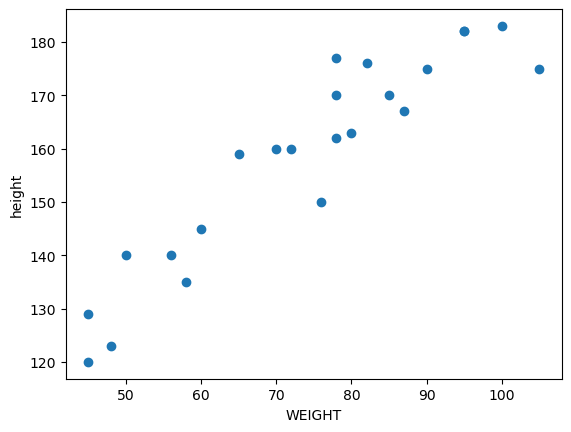

In [8]:
## checking how my output and input variable are related
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("WEIGHT")
plt.ylabel("height")

In [11]:
df.corr()
## uses pearson coeff and tells that height and weight are highly correlated

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


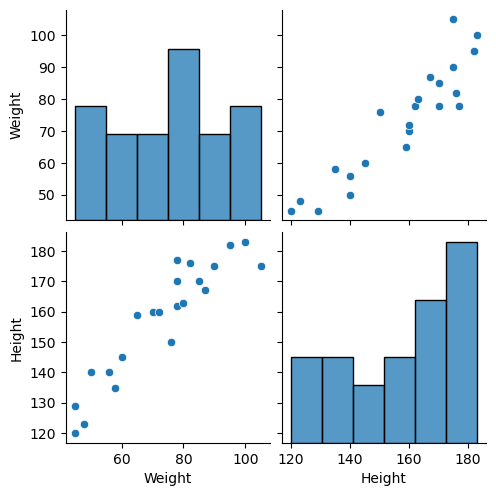

In [12]:
sns.pairplot(df)

In [13]:
##we can see that height and weight are positively correlated so linear reg can work well

In [17]:
X = df[['Weight']] #always indenpendent features should be in 2d array / 2d dataframe
np.array(X).shape

y = df['Height']  # series/11d works

In [18]:
#if we use single column then it is a series which is a sequence of values actually and 
# also the array from it will be 1 d array 
X1 = df['Weight']
np.array(X1).shape

(23,)

In [19]:
np.array(y).shape

(23,)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)

In [78]:
## standardization 
# zscore converting each fetaure with mean  = 0 and std_dev =1
# x-u/std_dev
from sklearn.preprocessing import StandardScaler

In [79]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# avoid data leakage only transform in x_test
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [81]:
# apply linear reg
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)

In [82]:
# passing seres / 1d array does not work
regression.fit(X1,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [83]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [84]:
regression.coef_   #just one ind features

array([17.2982057])

In [85]:
regression.intercept_

156.47058823529412

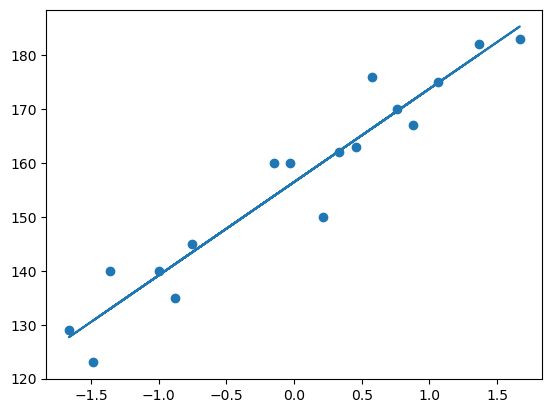

In [86]:
###plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [87]:
## prediction for test data)
y_pred = regression.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [89]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [90]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)

In [91]:
print(score)

0.7242334405003443


In [92]:
## ols implementation

In [93]:
import statsmodels.api as sm

In [94]:
model = sm.OLS(y_train,X_train).fit()

In [95]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                       0.664
Time:                        15:04:13   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [97]:
## coef is quite similar to the sklearn 

In [98]:
## pred for new data
scaler.transform([[34]])
# scaler

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.33054762]])

In [99]:
regression.predict(scaler.transform([[72]]))
## provide value in 2d array form

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [100]:
## rem to use scaling before getting the predicted values